# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1Tedk36g0_nsx8nagm-Us9lYyQHLSjiyD"
df = pd.read_csv(url)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

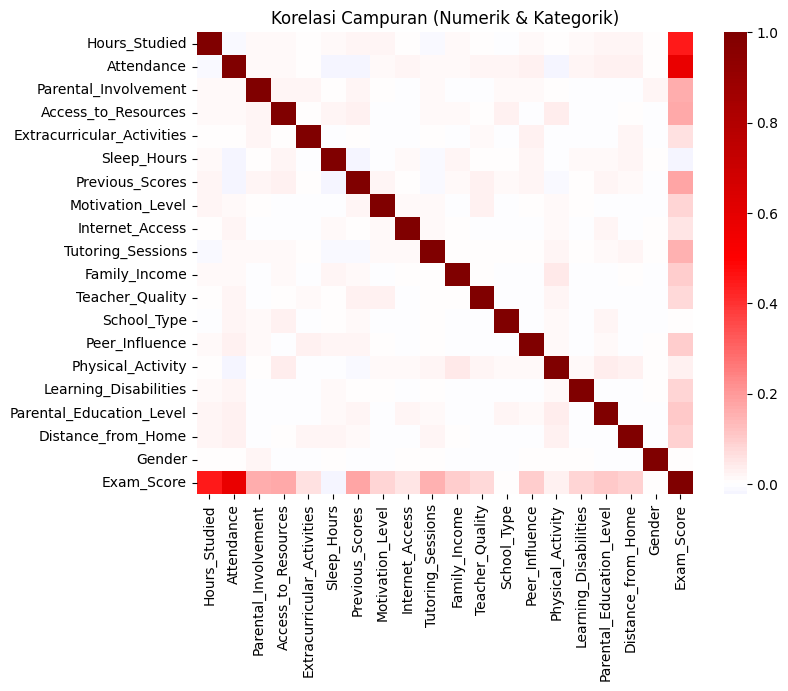

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def correlation_ratio(categories, values):
    categories = pd.factorize(categories)[0]
    mean_total = values.mean()
    n = len(values)
    ss_between = sum([
        np.sum(values[categories == i])**2 / np.sum(categories == i)
        for i in np.unique(categories)
    ]) - (np.sum(values)**2 / n)
    ss_total = np.sum((values - mean_total)**2)
    return np.sqrt(ss_between / ss_total)

def mixed_corr(df):
    corr = pd.DataFrame(index=df.columns, columns=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            if df[col1].dtype == 'O' and df[col2].dtype == 'O':
                corr.loc[col1, col2] = cramers_v(df[col1], df[col2])
            elif df[col1].dtype != 'O' and df[col2].dtype != 'O':
                corr.loc[col1, col2] = df[[col1, col2]].corr().iloc[0,1]
            else:
                cat_col, num_col = (col1, col2) if df[col1].dtype == 'O' else (col2, col1)
                corr.loc[col1, col2] = correlation_ratio(df[cat_col], df[num_col])
    return corr.astype(float)

corr_matrix = mixed_corr(df)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=False, cmap='seismic', center=0)
plt.title('Korelasi Campuran (Numerik & Kategorik)')
plt.show()

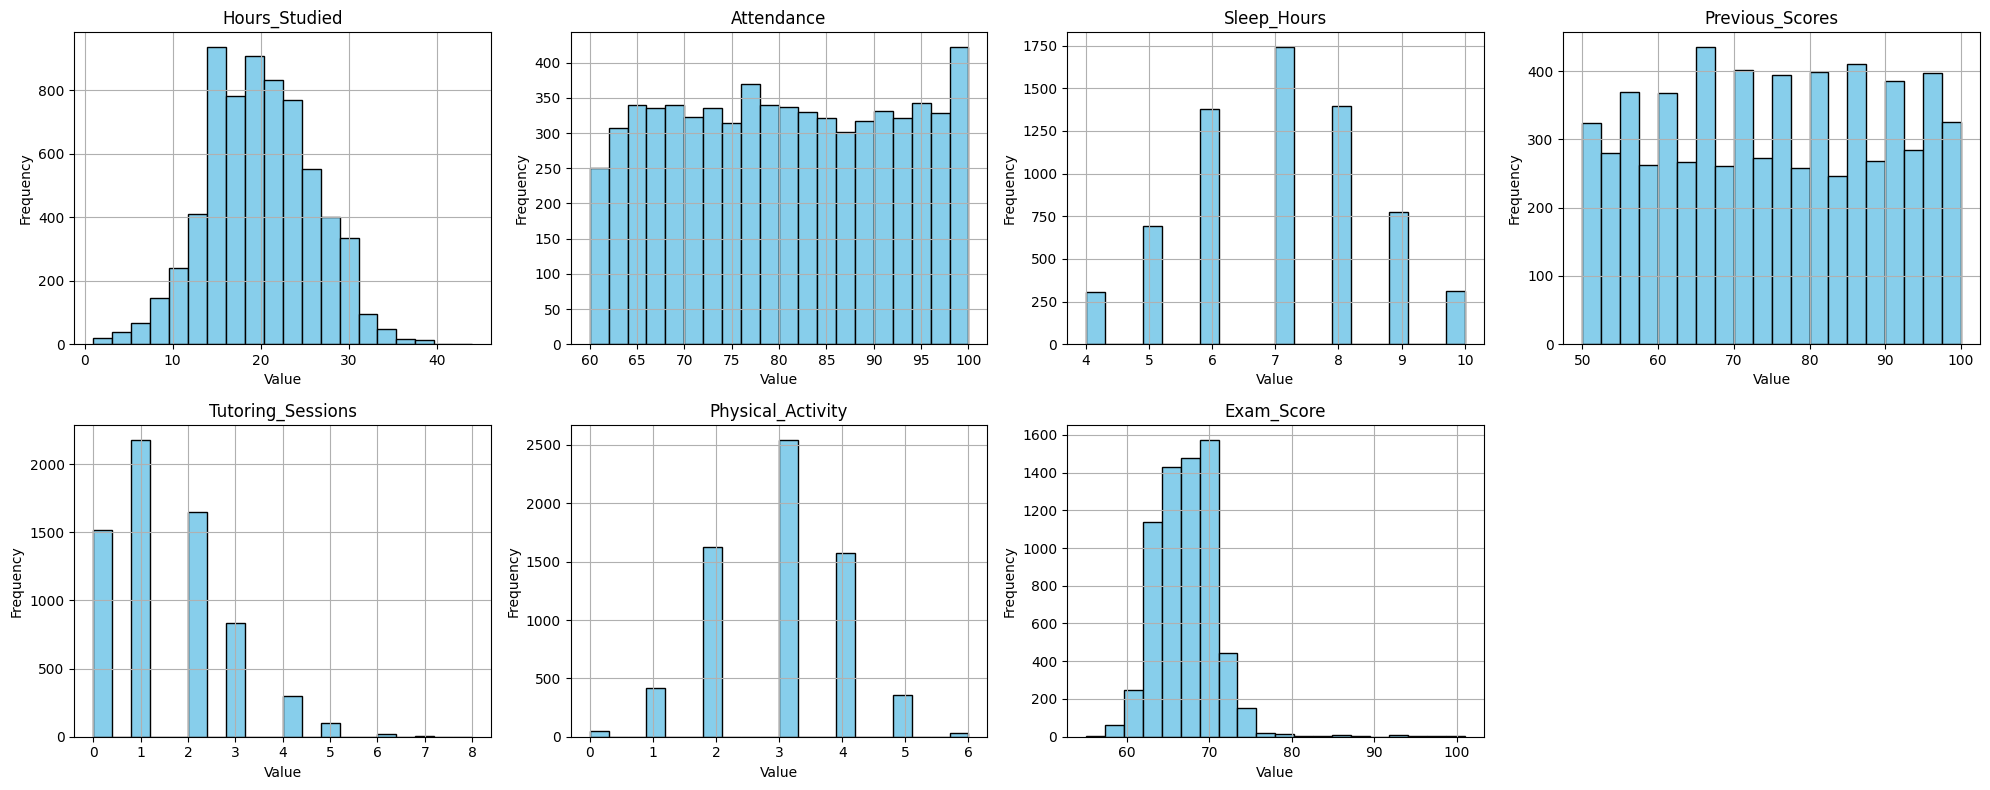

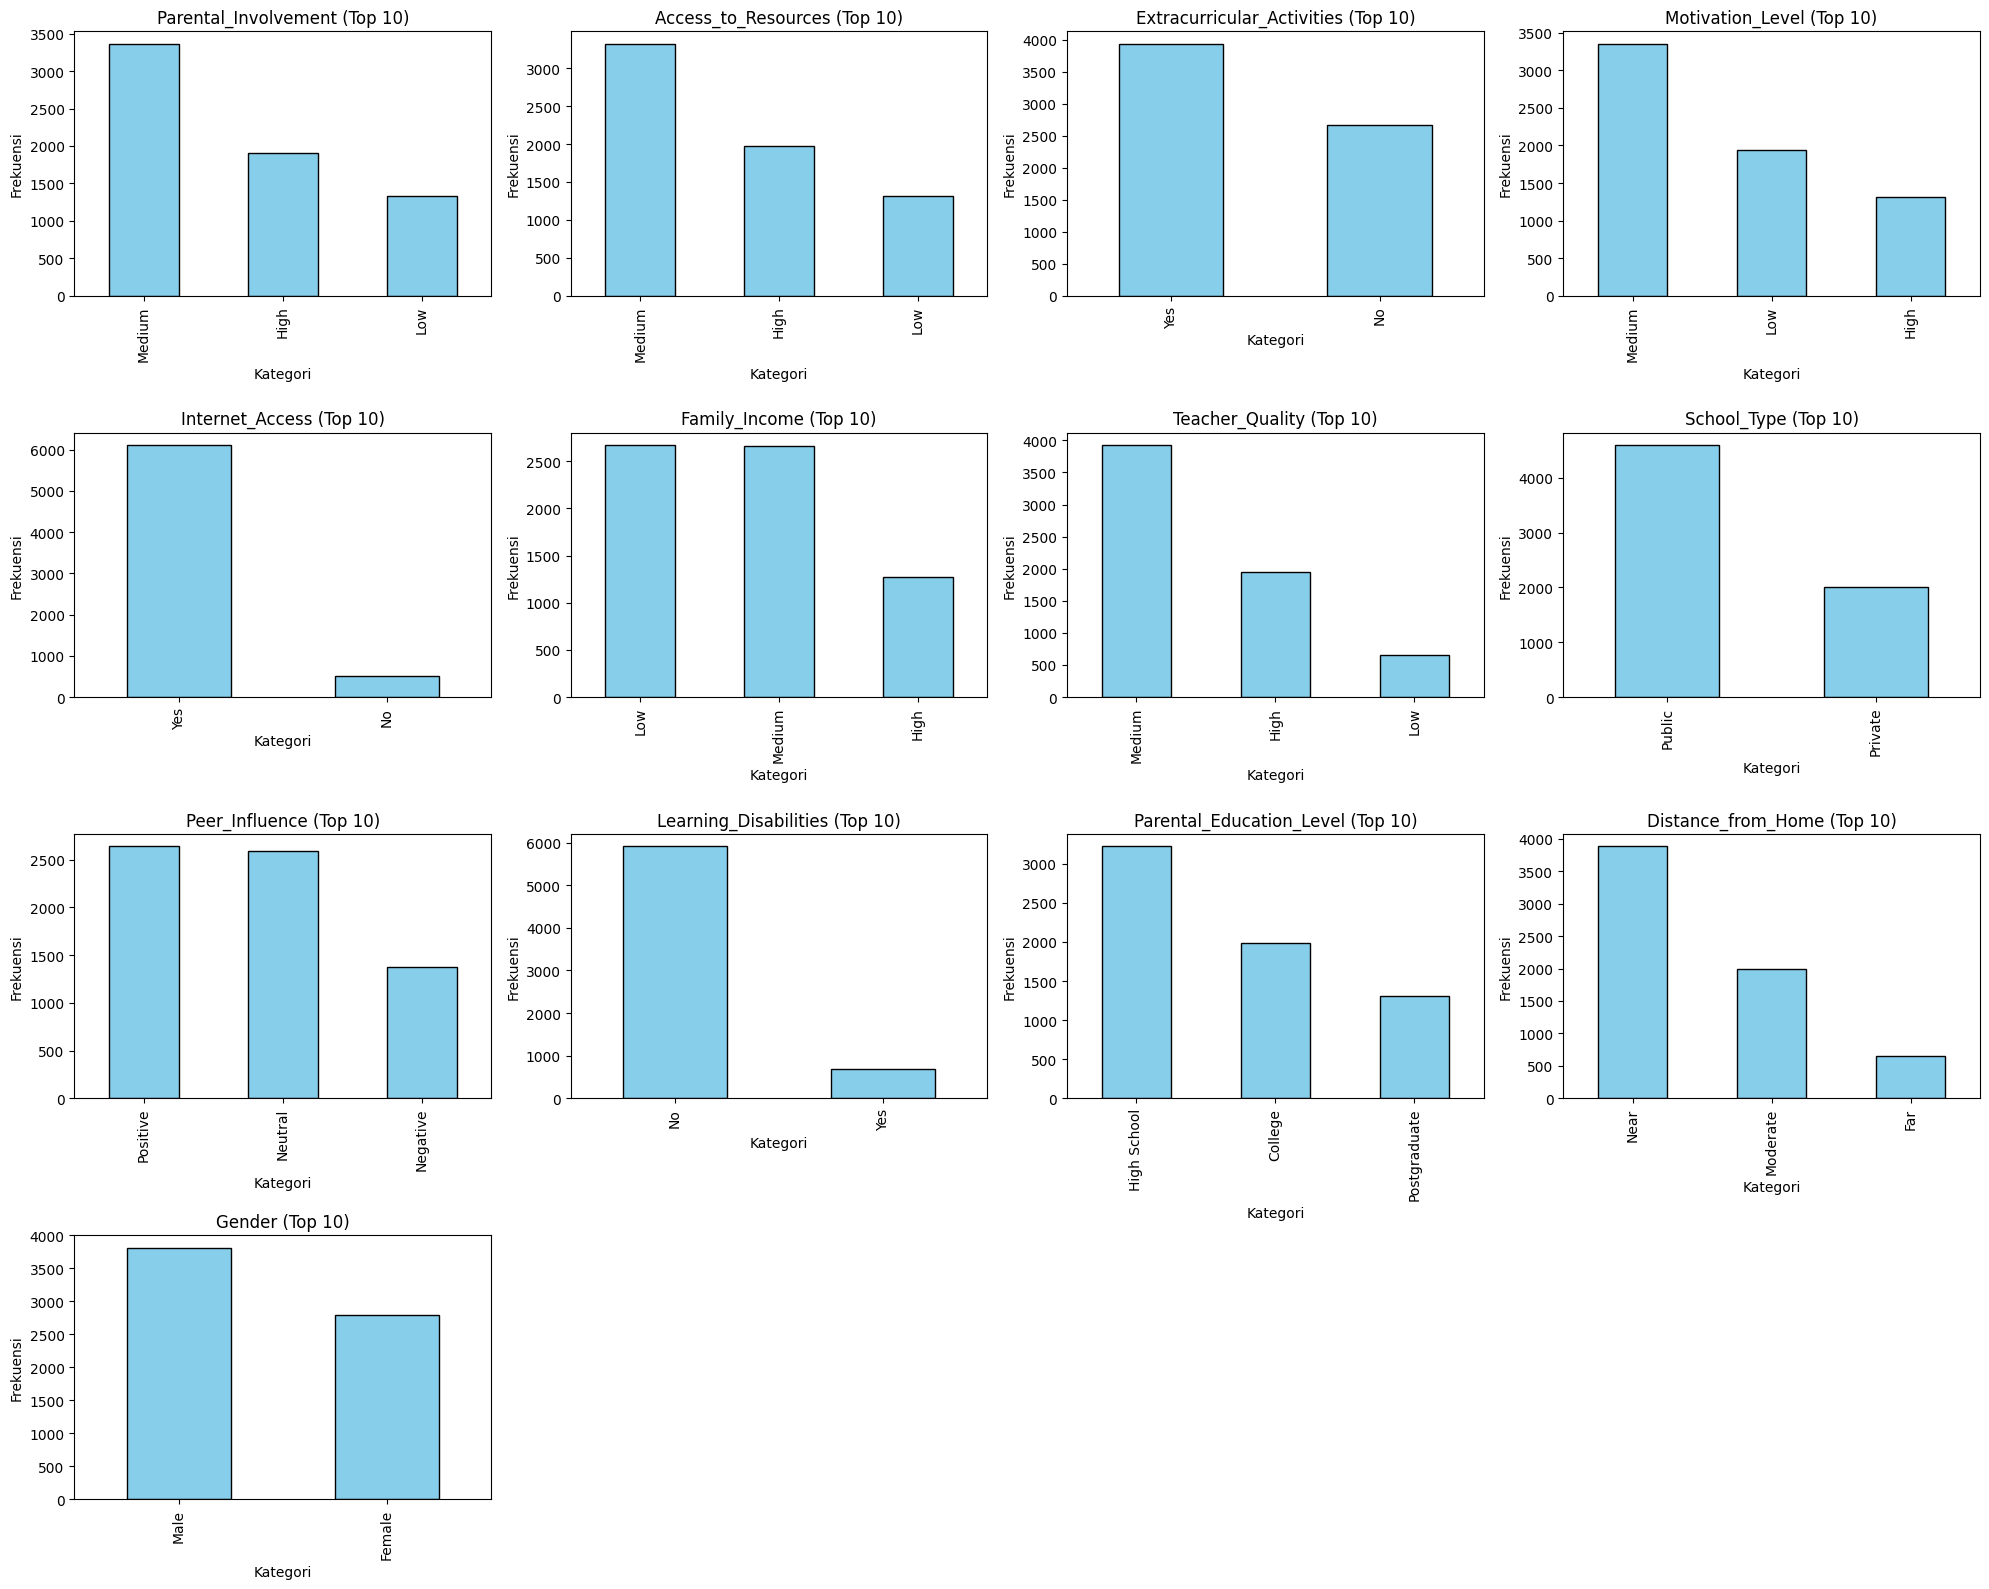

In [ ]:
# --- Fitur Numerik --- #
# Menghitung jumlah variabel
num_features = df.select_dtypes(include=['number'])
num_vars = num_features.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4 # Jumlah kolom
n_rows = -(-num_vars // n_cols) # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(num_features.columns):
    num_features[column].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# --- Fitur Kategorikal --- #
# Mengambil fitur kategorikal
cat_features = df.select_dtypes(exclude=['number'])
cat_vars = cat_features.columns
n_cat = len(cat_vars)

# Menentukan jumlah kolom dan baris subplot
n_cols = 4  # Jumlah kolom
n_rows = -(-n_cat // n_cols)  # Ceiling division

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Loop setiap fitur kategorikal
for i, column in enumerate(cat_vars):
    value_counts = df[column].value_counts().head(10)  # Ambil 10 kategori teratas
    value_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')

    axes[i].set_title(f'{column} (Top 10)')
    axes[i].set_xlabel('Kategori')
    axes[i].set_ylabel('Frekuensi')
    axes[i].tick_params(axis='x', rotation=90)

# Hapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

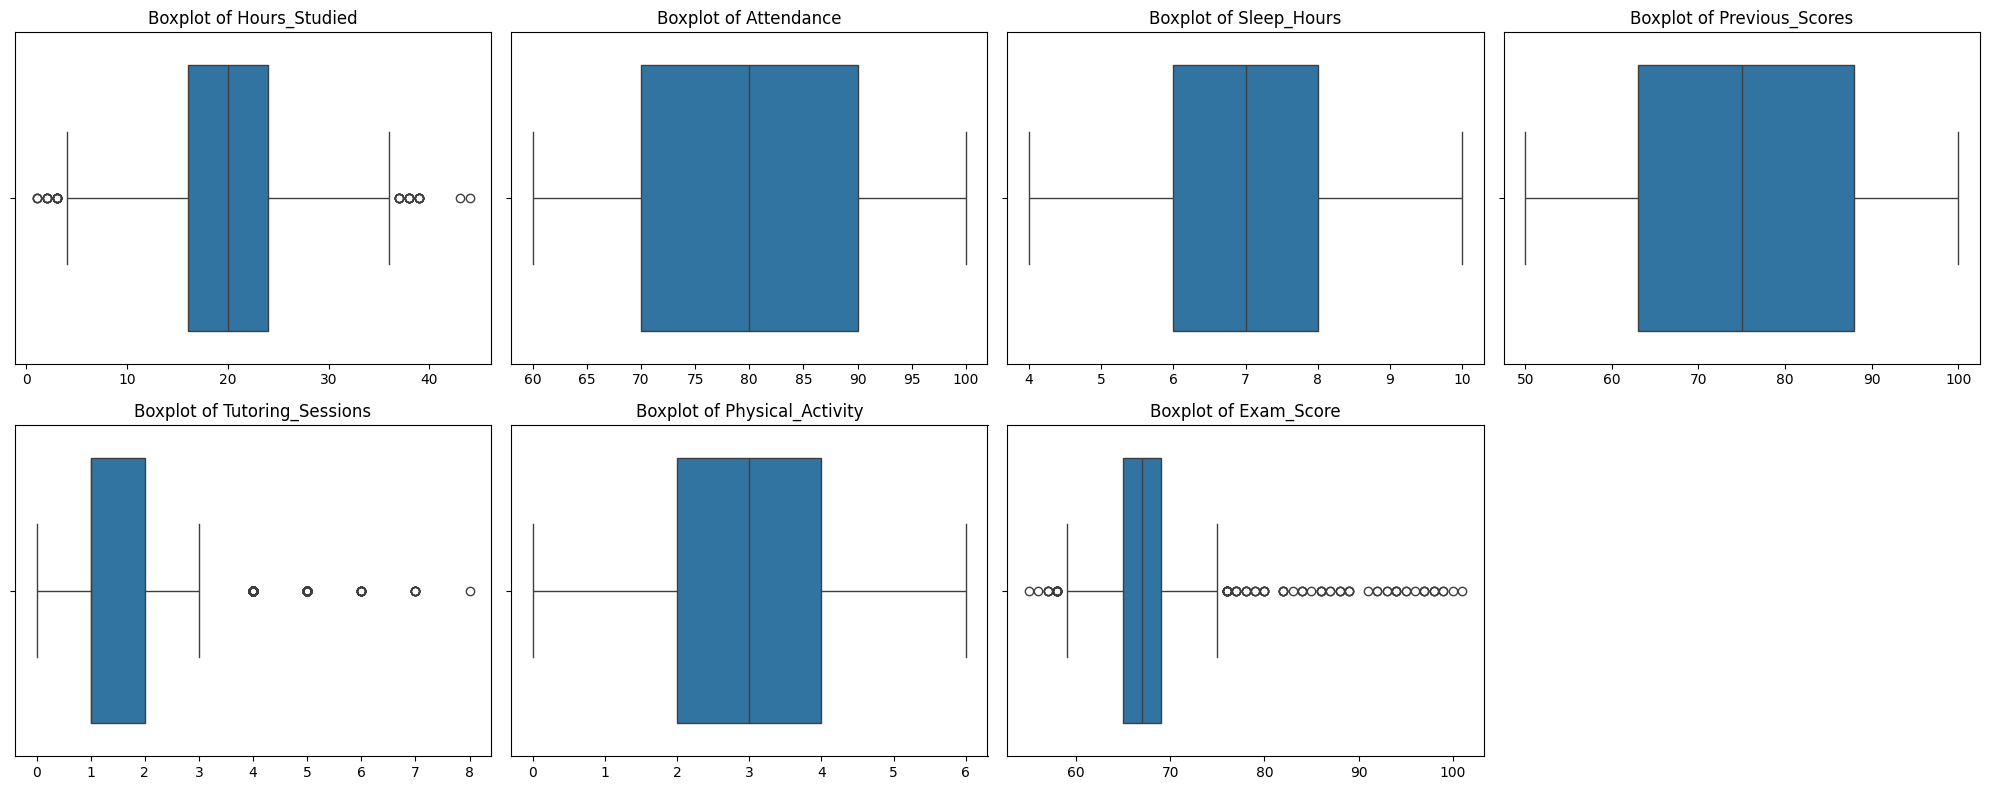

In [ ]:
num_features = df.select_dtypes(include=['number'])
num_cols = num_features.columns

n_cols = 4 # Number of columns for subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('') # Remove x-label to avoid clutter

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [ ]:
numeric_features = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# filter baris
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) |
              (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)


# simpan semua kolom (numeric + categorical)
df = df.loc[condition].reset_index(drop=True)

In [ ]:
num_features = df.select_dtypes(include=['number'])
num_cols = num_features.columns
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.516070,0.350283,Low,High,No,-0.023377,-0.147117,Low,Yes,-1.314932,Low,Medium,Public,Positive,0.037064,No,High School,Near,Male,0.005736
1,-0.176485,-1.389206,Low,Medium,No,0.657031,-1.122403,Low,Yes,0.718426,Medium,Medium,Public,Negative,1.008430,No,College,Moderate,Female,-1.854632
2,0.689209,1.567925,Medium,Medium,Yes,-0.023377,1.106823,Medium,Yes,0.718426,Medium,Medium,Public,Neutral,1.008430,No,Postgraduate,Near,Male,2.176166
3,1.554902,0.785155,Low,Medium,Yes,0.657031,1.594466,Medium,Yes,-0.298253,Medium,Medium,Public,Negative,1.008430,No,High School,Moderate,Male,1.245982
4,-0.176485,1.046078,Medium,Medium,Yes,-0.703785,-0.704423,Medium,Yes,1.735105,Medium,High,Public,Neutral,1.008430,No,College,Near,Female,0.935920


In [ ]:
label_encoder = LabelEncoder()

# Dictionary untuk menyimpan encoder
encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()  # Buat encoder baru untuk tiap kolom
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.516070,0.350283,1,0,0,-0.023377,-0.147117,1,1,-1.314932,1,2,1,2,0.037064,0,1,2,1,0.005736
1,-0.176485,-1.389206,1,2,0,0.657031,-1.122403,1,1,0.718426,2,2,1,0,1.008430,0,0,1,0,-1.854632
2,0.689209,1.567925,2,2,1,-0.023377,1.106823,2,1,0.718426,2,2,1,1,1.008430,0,2,2,1,2.176166
3,1.554902,0.785155,1,2,1,0.657031,1.594466,2,1,-0.298253,2,2,1,0,1.008430,0,1,1,1,1.245982
4,-0.176485,1.046078,2,2,1,-0.703785,-0.704423,2,1,1.735105,2,0,1,1,1.008430,0,0,2,0,0.935920
